## Week 3 Group Assignment 2 (Individual)
By: Jessica T. Lopez

The 'Sex' dataset from Social Explorer, based on the latest ACS 5 year estimates, provides information on the 'male' and 'female' population in Los Angeles County for 2021. This dataset will help illustrate its distribution throughout Los Angeles County and possibly help explain any correlation between sex and traffic incidents.

### Importing Data

I'll start by importing pandas to explore data from Social Explorer.

In [3]:
import pandas as pd
import geopandas as gpd

I Will now import 'Sex' Social Explorer data for Los Angeles County.

In [12]:
df = pd.read_csv('Census_Data_Sex.csv')

### Exploring the Data

First, I will be check the size of the data by using the shape function.

In [13]:
df.shape

(2498, 60)

There are 2498 rows and 60 columns in this dataset.

In [14]:
# Next, sample the first ten rows.
df.head(10)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A02001_001,SE_A02001_002,SE_A02001_003,PCT_SE_A02001_002,PCT_SE_A02001_003
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,3879,1944,1935,50.12,49.88
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,4247,2066,2181,48.65,51.35
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,3583,1692,1891,47.22,52.78
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,3723,1954,1769,52.48,47.52
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,2690,1174,1516,43.64,56.36
5,6037101300,"Census Tract 1013, Los Angeles County, California",ACSSF,ca,140,0,4205,NaN,NaN,NaN,...,14000US06037101300,Census Tract 1013,NaN,NaN,NaN,4068,1921,2147,47.22,52.78
6,6037101400,"Census Tract 1014, Los Angeles County, California",ACSSF,ca,140,0,4206,NaN,NaN,NaN,...,14000US06037101400,Census Tract 1014,NaN,NaN,NaN,3372,1610,1762,47.75,52.25
7,6037102103,"Census Tract 1021.03, Los Angeles County, Cali...",ACSSF,ca,140,0,4207,NaN,NaN,NaN,...,14000US06037102103,Census Tract 1021.03,NaN,NaN,NaN,1767,813,954,46.01,53.99
8,6037102104,"Census Tract 1021.04, Los Angeles County, Cali...",ACSSF,ca,140,0,4208,NaN,NaN,NaN,...,14000US06037102104,Census Tract 1021.04,NaN,NaN,NaN,4003,1733,2270,43.29,56.71
9,6037102105,"Census Tract 1021.05, Los Angeles County, Cali...",ACSSF,ca,140,0,4209,NaN,NaN,NaN,...,14000US06037102105,Census Tract 1021.05,NaN,NaN,NaN,1674,773,901,46.18,53.82


In [15]:
# Will be looking at the data type using the .info function
# Will use the argument 'verbose=true, show true counts'
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   int64  
 1   Geo_QName          2498 non-null   object 
 2   Geo_FILEID         2498 non-null   object 
 3   Geo_STUSAB         2498 non-null   object 
 4   Geo_SUMLEV         2498 non-null   int64  
 5   Geo_GEOCOMP        2498 non-null   int64  
 6   Geo_LOGRECNO       2498 non-null   int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          2498 non-null   int64  
 12  Geo_COUNTY         2498 non-null   int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          2498 non-null   int64  
 16  Geo_BLKGRP         0 non

In [8]:
# got the dtypes for the columns.

In [16]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

As per lab the leading zero's are important. Now I have to re-inport data to specify the Geo_FIPS column as a string.

In [17]:
df = pd.read_csv(
    'Census_Data_Sex.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)        

In [18]:
# now running the first ten columns once more
df.head(10)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A02001_001,SE_A02001_002,SE_A02001_003,PCT_SE_A02001_002,PCT_SE_A02001_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,3879,1944,1935,50.12,49.88
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,4247,2066,2181,48.65,51.35
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,3583,1692,1891,47.22,52.78
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,3723,1954,1769,52.48,47.52
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,2690,1174,1516,43.64,56.36
5,06037101300,"Census Tract 1013, Los Angeles County, California",ACSSF,ca,140,0,4205,NaN,NaN,NaN,...,14000US06037101300,Census Tract 1013,NaN,NaN,NaN,4068,1921,2147,47.22,52.78
6,06037101400,"Census Tract 1014, Los Angeles County, California",ACSSF,ca,140,0,4206,NaN,NaN,NaN,...,14000US06037101400,Census Tract 1014,NaN,NaN,NaN,3372,1610,1762,47.75,52.25
7,06037102103,"Census Tract 1021.03, Los Angeles County, Cali...",ACSSF,ca,140,0,4207,NaN,NaN,NaN,...,14000US06037102103,Census Tract 1021.03,NaN,NaN,NaN,1767,813,954,46.01,53.99
8,06037102104,"Census Tract 1021.04, Los Angeles County, Cali...",ACSSF,ca,140,0,4208,NaN,NaN,NaN,...,14000US06037102104,Census Tract 1021.04,NaN,NaN,NaN,4003,1733,2270,43.29,56.71
9,06037102105,"Census Tract 1021.05, Los Angeles County, Cali...",ACSSF,ca,140,0,4209,NaN,NaN,NaN,...,14000US06037102105,Census Tract 1021.05,NaN,NaN,NaN,1674,773,901,46.18,53.82


In [83]:
# now all Geo_FIPS have a leading zero

Now, I will be re-running data to make sure the dataframe has the 
correct datatype.

In [19]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_FILEID         2498 non-null   object 
 3   Geo_STUSAB         2498 non-null   object 
 4   Geo_SUMLEV         2498 non-null   int64  
 5   Geo_GEOCOMP        2498 non-null   int64  
 6   Geo_LOGRECNO       2498 non-null   int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          2498 non-null   object 
 12  Geo_COUNTY         2498 non-null   object 
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          2498 non-null   int64  
 16  Geo_BLKGRP         0 non

### Cleaning up the Data

As I was going thrgouth the data there were many columns without data.
Now its time to eliminate all empty columns.

In [21]:
# To do so I will use the .columns,.isna,.all commands.
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [22]:
# the columns listed above now have to be eliminated.
# I will use the follwoing command to do so:
df = df.dropna(axis=1, how= 'all')

In [23]:
# Will now check to see if these columns were dropped.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_FILEID         2498 non-null   object 
 3   Geo_STUSAB         2498 non-null   object 
 4   Geo_SUMLEV         2498 non-null   int64  
 5   Geo_GEOCOMP        2498 non-null   int64  
 6   Geo_LOGRECNO       2498 non-null   int64  
 7   Geo_STATE          2498 non-null   object 
 8   Geo_COUNTY         2498 non-null   object 
 9   Geo_TRACT          2498 non-null   int64  
 10  Geo_GEOID          2498 non-null   object 
 11  Geo_NAME           2498 non-null   object 
 12  SE_A02001_001      2498 non-null   int64  
 13  SE_A02001_002      2498 non-null   int64  
 14  SE_A02001_003      2498 non-null   int64  
 15  PCT_SE_A02001_002  2478 non-null   float64
 16  PCT_SE_A02001_003  2478 

In [28]:
# have to reinspect data
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A02001_001,SE_A02001_002,SE_A02001_003,PCT_SE_A02001_002,PCT_SE_A02001_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,14000US06037101110,Census Tract 1011.10,3879,1944,1935,50.12,49.88
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,14000US06037101122,Census Tract 1011.22,4247,2066,2181,48.65,51.35
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,14000US06037101220,Census Tract 1012.20,3583,1692,1891,47.22,52.78
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,14000US06037101221,Census Tract 1012.21,3723,1954,1769,52.48,47.52
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,14000US06037101222,Census Tract 1012.22,2690,1174,1516,43.64,56.36


In [29]:
# it is looking much better now that all the empty columns have been eliminated.

After going through the data dictionary I decided to keep 
FIPS, and percentage of male/female population.

In [30]:
columns_to_keep = ['Geo_FIPS', 
                   'SE_A02001_001',
                   'SE_A02001_002',
                   'SE_A02001_003',]
#add it to new data frame
df2 = df[columns_to_keep]

### Renaming the Columns

I will rename the columns I want to keep, which are: FIPS, Total population, male and female. 

In [31]:
columns = list (df2)
columns
# its the same list created in the columns to keep cell above

['Geo_FIPS', 'SE_A02001_001', 'SE_A02001_002', 'SE_A02001_003']

I have copied the values above in the cell below, replacing them with names of my choice.

In [36]:
df2.columns = ['FIPS','TotalPop', 'Male', 'Female']

In [37]:
# checking dataset for new names/titles
df2.sample(4)

,FIPS,TotalPop,Male,Female
1390,06037430502,6514,2838,3676
1829,06037543703,3864,1875,1989
2438,06037920121,10391,5567,4824
449,06037189801,1766,820,946


### Simple Stats and Plots

In [38]:
# checking total population
df2['TotalPop'].head()

0    3879
1    4247
2    3583
3    3723
4    2690
Name: TotalPop, dtype: int64

In [39]:
# What is the population mean?
df2['TotalPop'].mean()

4011.062850280224

In [40]:
# What is the median?
df2['TotalPop'].median()

3933.0

In [41]:
# Now some stats
df2['TotalPop'].describe()

count     2498.00000
mean      4011.06285
std       1470.99188
min          0.00000
25%       2993.25000
50%       3933.00000
75%       4954.00000
max      13830.00000
Name: TotalPop, dtype: float64

<AxesSubplot: ylabel='Frequency'>

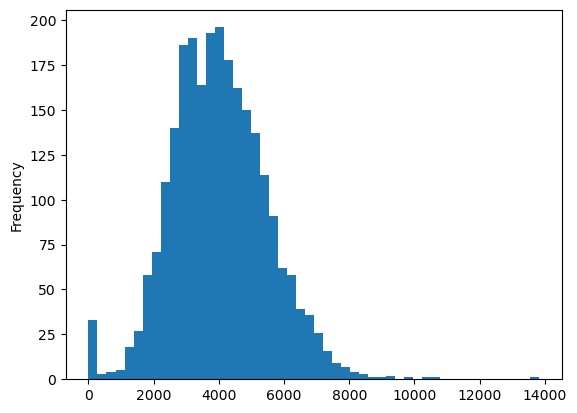

In [43]:
#plotting as a histogram with 50 bins
df2['TotalPop'].plot.hist(bins=50)

<AxesSubplot: >

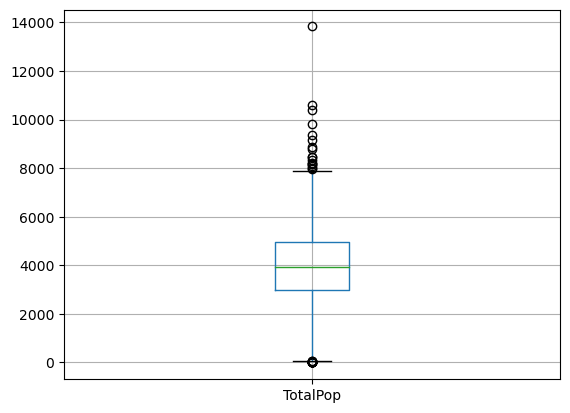

In [44]:
# using box plot
df2.boxplot(column=['TotalPop'])

<AxesSubplot: xlabel='Male', ylabel='Female'>

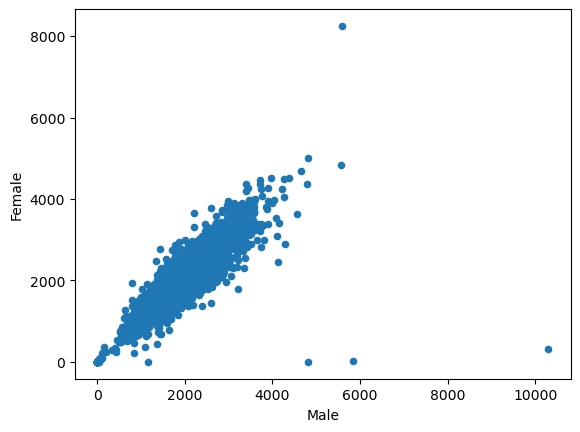

In [46]:
# using a scatter plot
df2.plot.scatter(x='Male', y='Female')

### Sorting

Now, I will be looking for the most populated census tract.

In [47]:
df_sorted=df2.sort_values(by='TotalPop',ascending = False)

In [50]:
#display a few columns of data
df_sorted[['FIPS','TotalPop']].head(10)

,FIPS,TotalPop
938,06037265301,13830
580,06037206020,10614
2438,06037920121,10391
1028,06037275604,9814
2278,06037702900,9355
2406,06037920028,9158
1604,06037502303,8883
69,06037108202,8776
2417,06037920043,8468
1207,06037401707,8464


<AxesSubplot: xlabel='FIPS'>

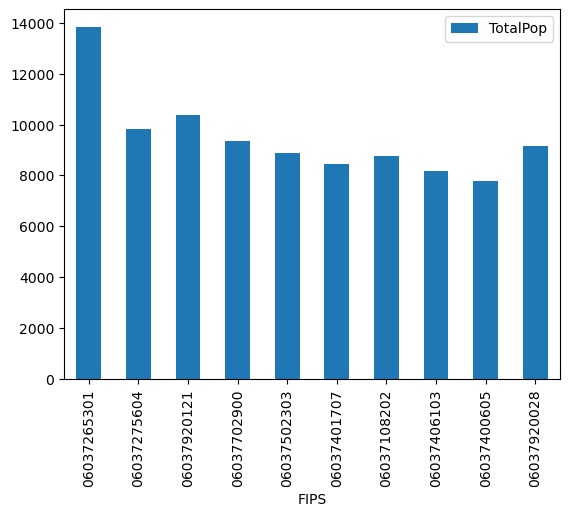

In [65]:
# now plotting for total population
df_sorted.head(10).plot.bar(x='FIPS', y='TotalPop')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population in Los Angeles County in 2021'}, ylabel='FIPS'>

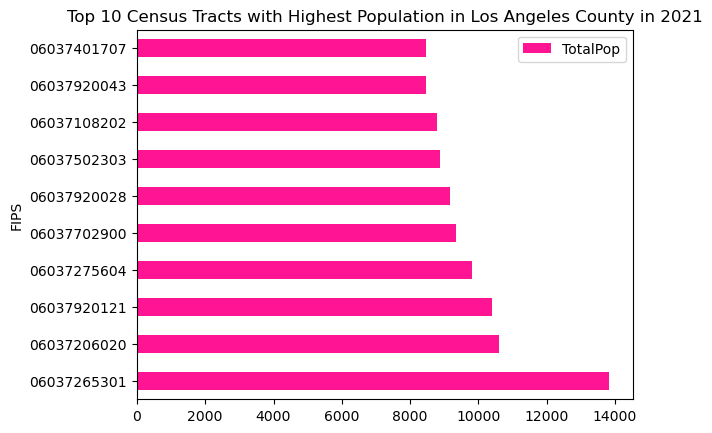

In [55]:
# Now cleaning it up and adding titles 
df_sorted.head(10).plot.barh(x='FIPS',
                             y='TotalPop',
                             title='Top 10 Census Tracts with Highest Population in Los Angeles County in 2021',
                             color='deeppink')

Now I want to check which tracts have the highest Male and Female populations.

In [56]:
df_sorted=df2.sort_values(by='Male',ascending = False)

In [57]:
#display a few columns of data
df_sorted[['FIPS','Male']].head(10)

,FIPS,Male
580,06037206020,10299
2439,06037920200,5838
938,06037265301,5581
2438,06037920121,5567
1028,06037275604,4819
2334,06037901003,4817
2406,06037920028,4796
2278,06037702900,4660
2411,06037920035,4561
1604,06037502303,4367


<AxesSubplot: xlabel='FIPS'>

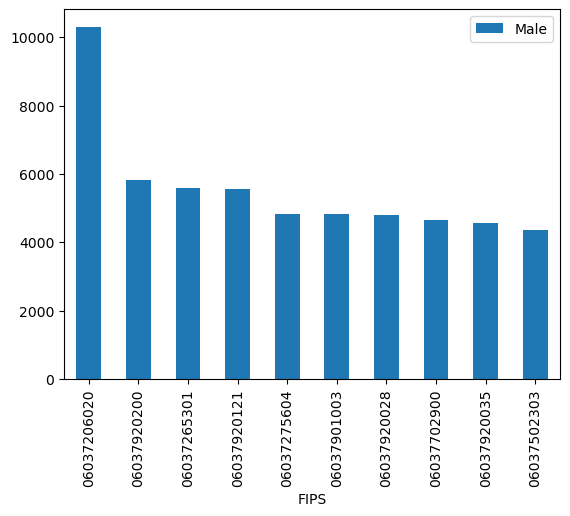

In [58]:
# now plotting for male population
df_sorted.head(10).plot.bar(x='FIPS', y='Male')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Male Population in Los Angeles County in 2021'}, ylabel='FIPS'>

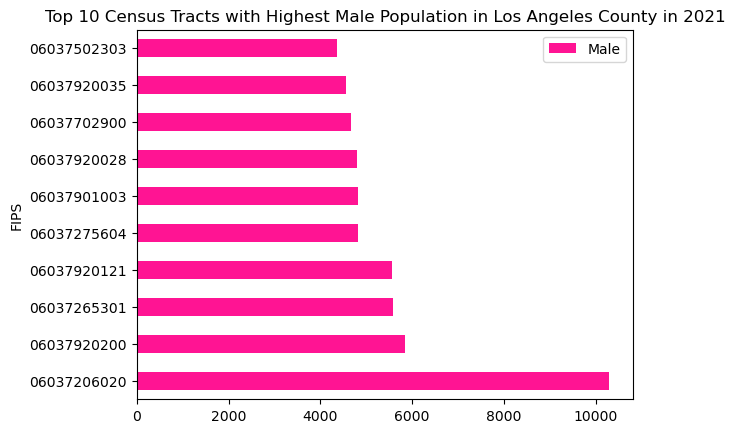

In [59]:
# Now cleaning it up and adding titles 
df_sorted.head(10).plot.barh(x='FIPS',
                             y='Male',
                             title='Top 10 Census Tracts with Highest Male Population in Los Angeles County in 2021',
                             color='deeppink')

In [66]:
# Now sorting for Female population
df_sorted=df2.sort_values(by='Female',ascending = False)

In [62]:
#display a few columns of data
df_sorted[['FIPS','Female']].head(10)

,FIPS,Female
938,06037265301,8249
1028,06037275604,4995
2438,06037920121,4824
2278,06037702900,4695
1604,06037502303,4516
1207,06037401707,4506
69,06037108202,4501
1309,06037406103,4471
1189,06037400605,4375
2406,06037920028,4362


<AxesSubplot: xlabel='FIPS'>

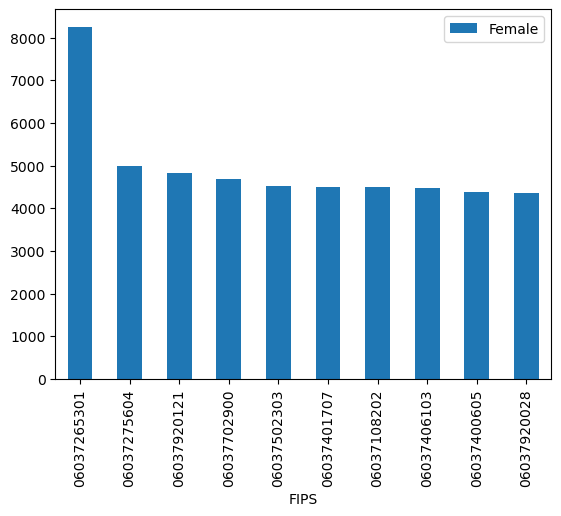

In [67]:
# now plotting for Female population
df_sorted.head(10).plot.bar(x='FIPS', y='Female')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Female Population in Los Angeles County in 2021'}, ylabel='FIPS'>

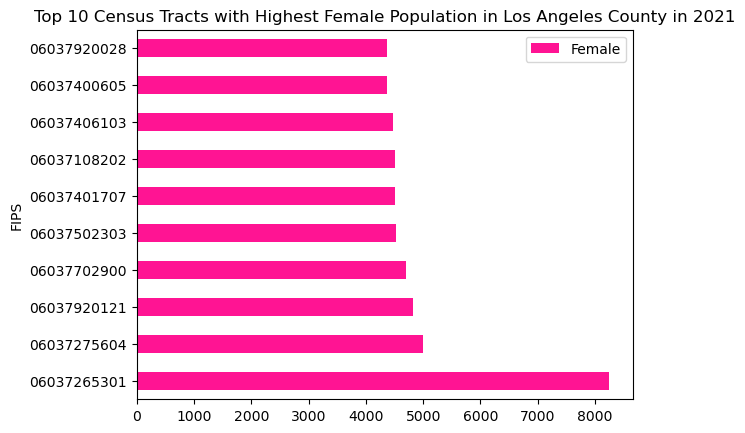

In [64]:
# Now cleaning it up and adding titles 
df_sorted.head(10).plot.barh(x='FIPS',
                             y='Female',
                             title='Top 10 Census Tracts with Highest Female Population in Los Angeles County in 2021',
                             color='deeppink')

### Filtering and Subsetting Data

First, filtering for census tracts without people

In [69]:
# subsetting the data to see the data per row
df2[df2['TotalPop']==0]

,FIPS,TotalPop,Male,Female
2459,06037980001,0,0,0
2460,06037980002,0,0,0
2461,06037980003,0,0,0
2462,06037980004,0,0,0
2463,06037980005,0,0,0
2464,06037980006,0,0,0
2465,06037980007,0,0,0
2471,06037980013,0,0,0
2476,06037980018,0,0,0
2478,06037980020,0,0,0


In [70]:
# now creating a new variable for census tracts with zero population
df_no_pop=df2[df2['TotalPop']==0]

In [71]:
# how many records for census tracts with zero population
print('There are ' + str(len(df_no_pop)) + 'census tracts with no people in them')

There are 20census tracts with no people in them


In [72]:
# now displaying census tracts without people
df_no_pop[['FIPS','TotalPop']]

,FIPS,TotalPop
2459,06037980001,0
2460,06037980002,0
2461,06037980003,0
2462,06037980004,0
2463,06037980005,0
2464,06037980006,0
2465,06037980007,0
2471,06037980013,0
2476,06037980018,0
2478,06037980020,0


### Finally, time for Maps!

Now, I will start by importing geopandas.

In [73]:
import geopandas as gpd

In [75]:
# since our data is based in LA I will import LA Census tracts
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

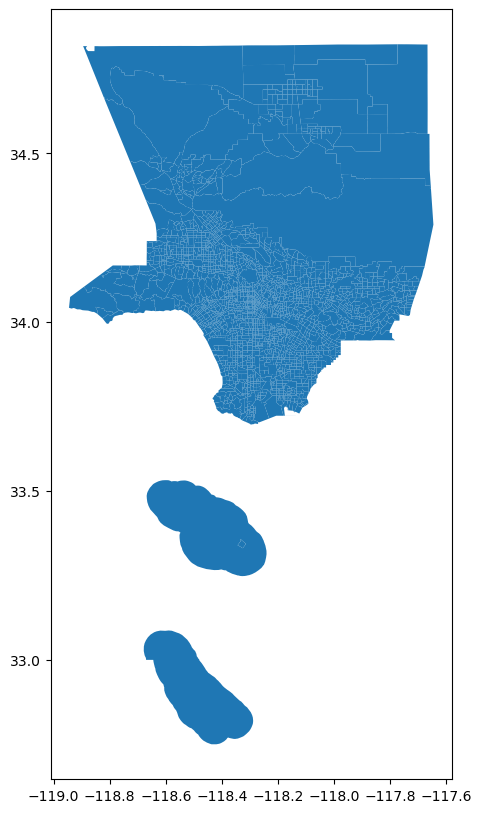

In [76]:
# time to plot
tracts.plot(figsize=(12,10))

In [77]:
# want to more about dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [78]:
# will only need FIPS and geometry, so I need to subset the data
tracts=tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [81]:
# Now I will create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [82]:
# Now checking
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


### Merging Data

Will now be joining census tract data with Male/Female population data.

In [83]:
# creating a new dataframe based on the join
tracts_sex=tracts.merge(df2,on="FIPS")

In [85]:
# checking on how it looks now
tracts_sex.head()

,CT20,geometry,FIPS,TotalPop,Male,Female
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,3879,1944,1935
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,4247,2066,2181
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3583,1692,1891
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3723,1954,1769
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2690,1174,1516


### Chloropleth Maps

Will now create chloropleth maps in geopandas.

#### Maps for Male Population

<AxesSubplot: >

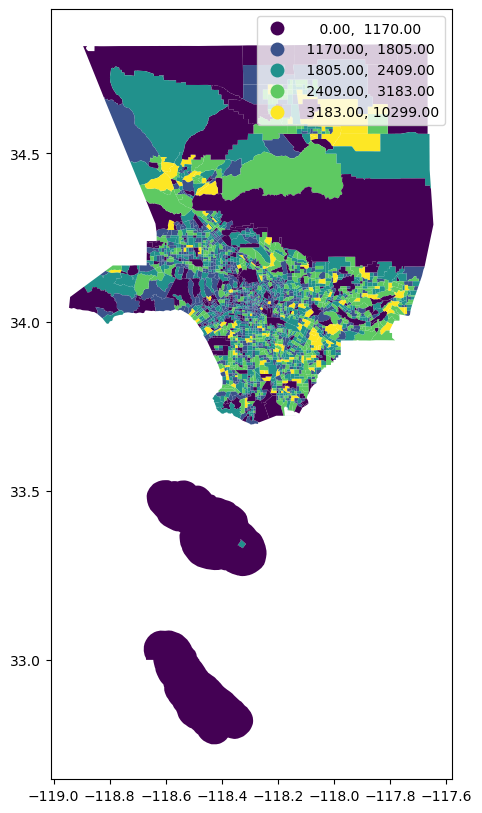

In [89]:
tracts_sex.plot(figsize=(12,10),
                 column='Male',
                 legend=True, 
                 scheme='NaturalBreaks')              

<AxesSubplot: >

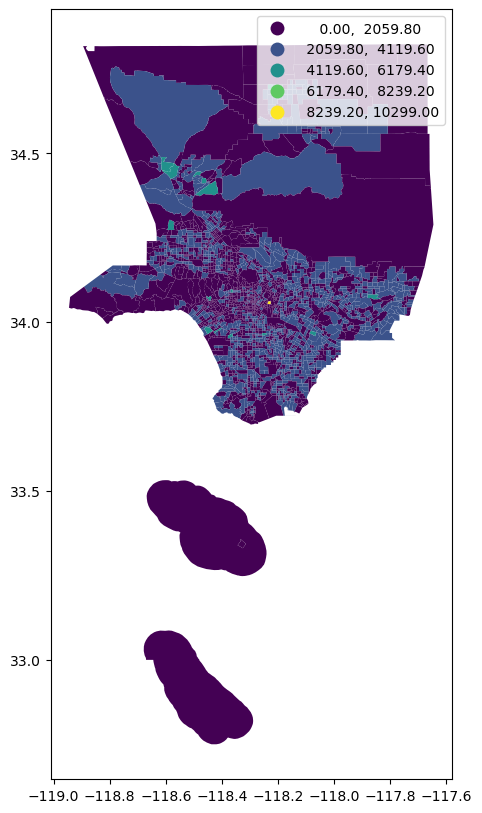

In [90]:
tracts_sex.plot(figsize=(12,10),
                 column='Male',
                 legend=True, 
                 scheme='equal_interval') 

<AxesSubplot: >

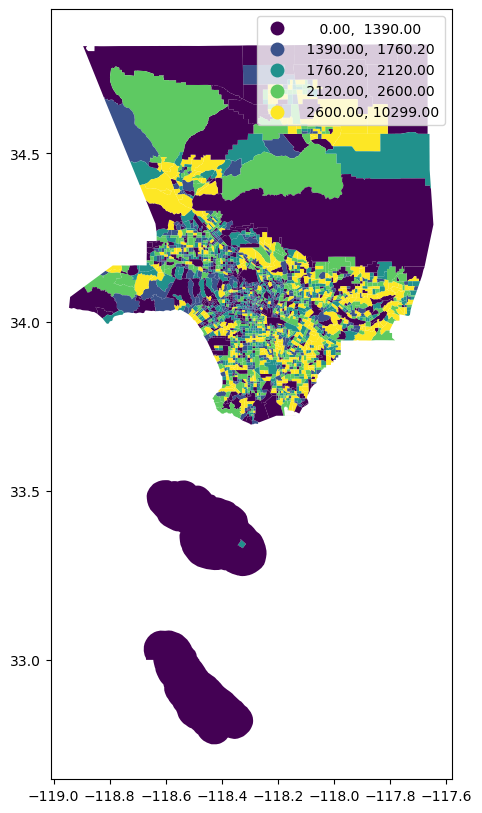

In [91]:
tracts_sex.plot(figsize=(12,10),
                 column='Male',
                 legend=True, 
                 scheme='quantiles') 

#### Maps for Female Population

<AxesSubplot: >

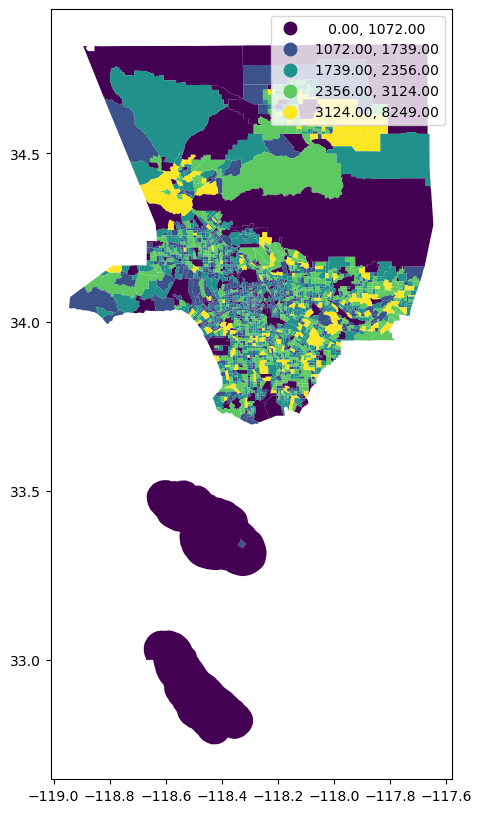

In [92]:
tracts_sex.plot(figsize=(12,10),
                 column='Female',
                 legend=True, 
                 scheme='NaturalBreaks') 

<AxesSubplot: >

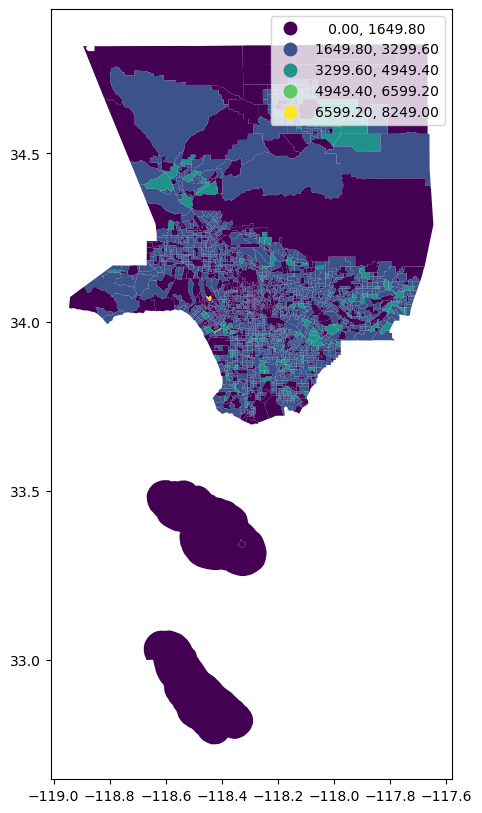

In [93]:
tracts_sex.plot(figsize=(12,10),
                 column='Female',
                 legend=True, 
                 scheme='equal_interval') 

<AxesSubplot: >

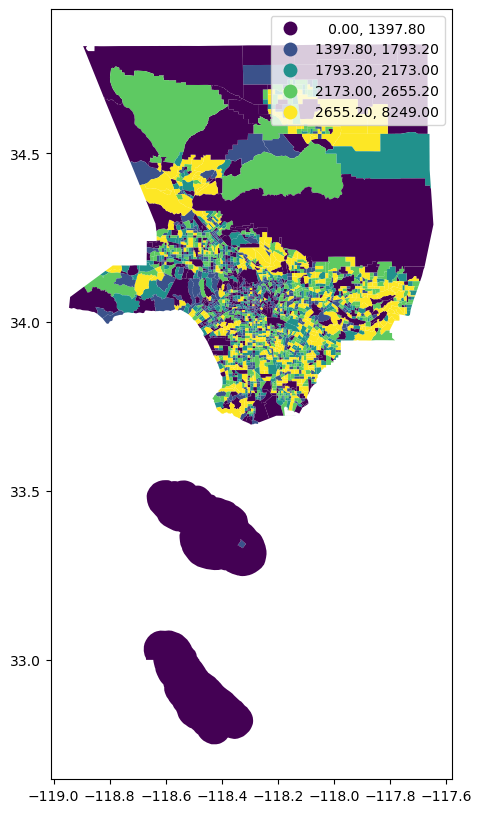

In [94]:
tracts_sex.plot(figsize=(12,10),
                 column='Female',
                 legend=True, 
                 scheme='quantiles') 

In [95]:
tracts_sex['PCT_Black'] = tracts_sex['Male']/tracts_sex['TotalPop']*100
tracts_sex['PCT_White'] = tracts_sex['Female']/tracts_sex['TotalPop']*100

<AxesSubplot: >

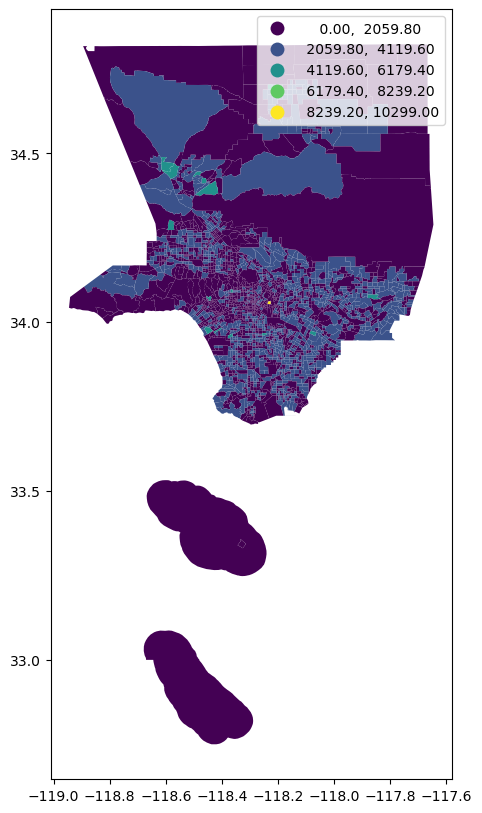

In [96]:
tracts_sex.plot(figsize=(12,10),
                 column='Male',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

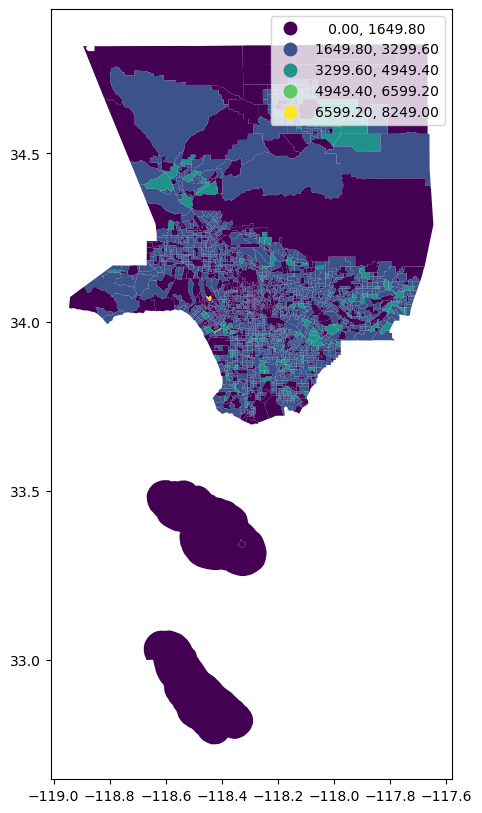

In [105]:
tracts_sex.plot(figsize=(12,10),
                 column='Female',
                 legend=True, 
                 scheme='equal_interval')

In [106]:
m.save('sex.html')